In [51]:
import datetime as dt
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser as dtparser

import utils

plt.rc('font', family="Malgun Gothic")

In [21]:
keywords = {}
keywords["kin"] = ["환자 권리", "환자 요구", "환자 의견"]
keywords["news"] = []
keywords["news_api"] = ["환자-의사 공유 의사결정"]
keywords["news_crawl"] = ["환자 의사 공유의사결정"]

filenames = {}
filenames["kin"] = utils.FileType.KIN_WT.value
filenames["news"] = ""
filenames["news_api"] = utils.FileType.NEWS_WT.value
filenames["news_crawl"] = utils.FileType.CRAWL_NEWS.value

source_types = ["news_api", "news_crawl", "kin"]

In [22]:
# get df

df = {}
for source_type in source_types:
    df[source_type] = {}
    for keyword in keywords[source_type]:
        data_json = utils.get_json_from_file(f'{filenames[source_type]}_{keyword}.txt')
        df[source_type][keyword] = pd.DataFrame(data_json)

In [28]:
# preprocessing df

source_type = "news_api"
for keyword in keywords[source_type]:
    df[source_type][keyword]["date"] = pd.to_datetime(df[source_type][keyword]["date"])

source_type = "news_crawl"
for keyword in keywords[source_type]:
    df[source_type][keyword]["date"] = pd.to_datetime(df[source_type][keyword]["date"])


def dtparse(s: str):
    if s.startswith("작성일"):
        s = s[3:]
    try:
        return dtparser.parse(s)
    except dtparser.ParserError:
        return None

source_type = "kin"
for keyword in keywords[source_type]:
    df[source_type][keyword]["date"] = df[source_type][keyword]["date"].apply(lambda x: list(map(lambda y: dtparse(y), x)))

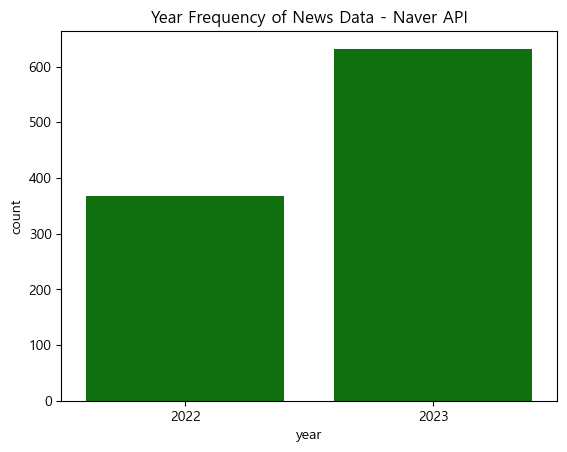

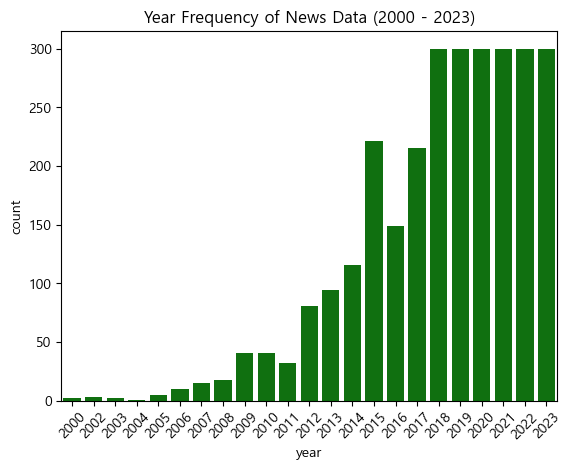

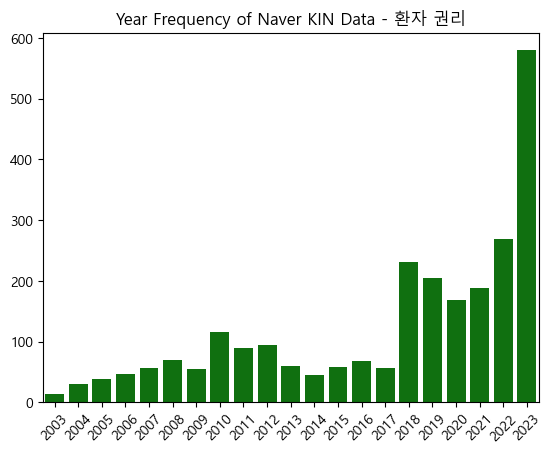

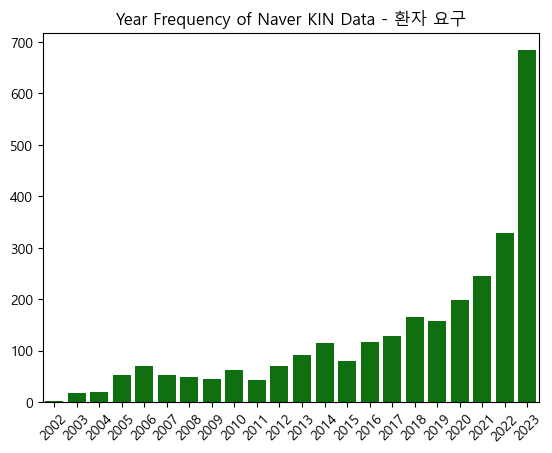

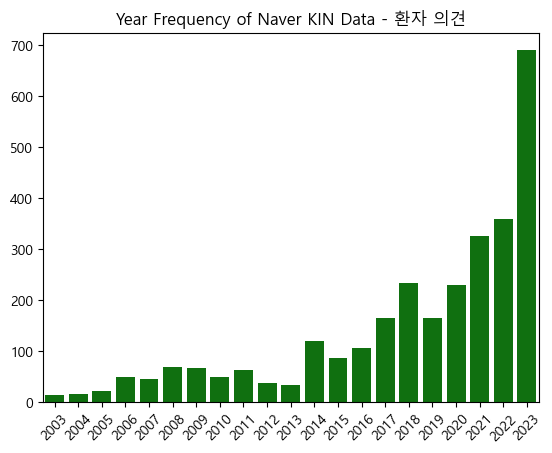

In [54]:
# basic year freq

source_type = "news_api"
for keyword in keywords[source_type]:
    df[source_type][keyword]["year"] = df[source_type][keyword]["date"].dt.year
    sns.countplot(data=df[source_type][keyword], x="year", color="green")
    plt.title("Year Frequency of News Data - Naver API")
    plt.show()

source_type = "news_crawl"
for keyword in keywords[source_type]:
    df[source_type][keyword]["year"] = df[source_type][keyword]["date"].dt.year
    sns.countplot(data=df[source_type][keyword], x="year", color="green")
    plt.title("Year Frequency of News Data (2000 - 2023)")
    plt.xticks(rotation=45)
    plt.show()

source_type = "kin"
t = 0
for keyword in keywords[source_type]:
    year_dict = defaultdict(int)
    for row in df[source_type][keyword]["date"]:
        for date in row:
            if date is None:
                continue
            year_dict[date.year] += 1
    sns.barplot(year_dict, color = "green")
    plt.title(f"Year Frequency of Naver KIN Data - {keyword}")
    plt.xticks(rotation=45)
    plt.show()